Making Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading and Exploring the dataset

In [2]:
df = pd.read_csv('data_banknote_authentication.txt',names=['variance','assymetry','kurtosis','image_entropy','authenticity'])

In [3]:
df.head()

,variance,assymetry,kurtosis,image_entropy,authenticity
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance,assymetry,kurtosis,image_entropy,authenticity
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.count()

variance         1372
assymetry        1372
kurtosis         1372
image_entropy    1372
authenticity     1372
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance         1372 non-null float64
assymetry        1372 non-null float64
kurtosis         1372 non-null float64
image_entropy    1372 non-null float64
authenticity     1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Data Visualization

In [7]:
sns.set_style('whitegrid')

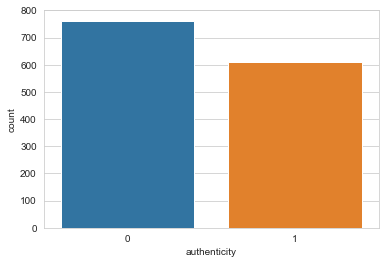

In [8]:
sns.countplot('authenticity', data =df)

The data is  almost evenly distributed and so contains little or no bias

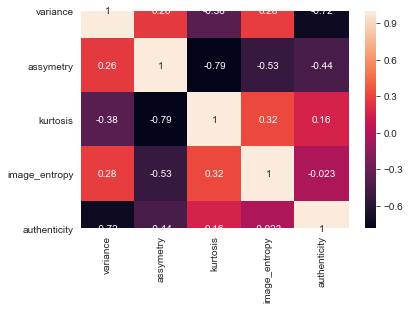

In [17]:
sns.heatmap(df.corr(),annot = True)


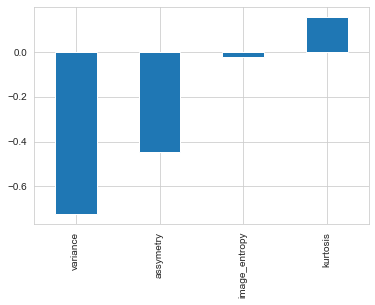

In [46]:
df.corr()['authenticity'].sort_values().drop('authenticity').plot(kind='bar')

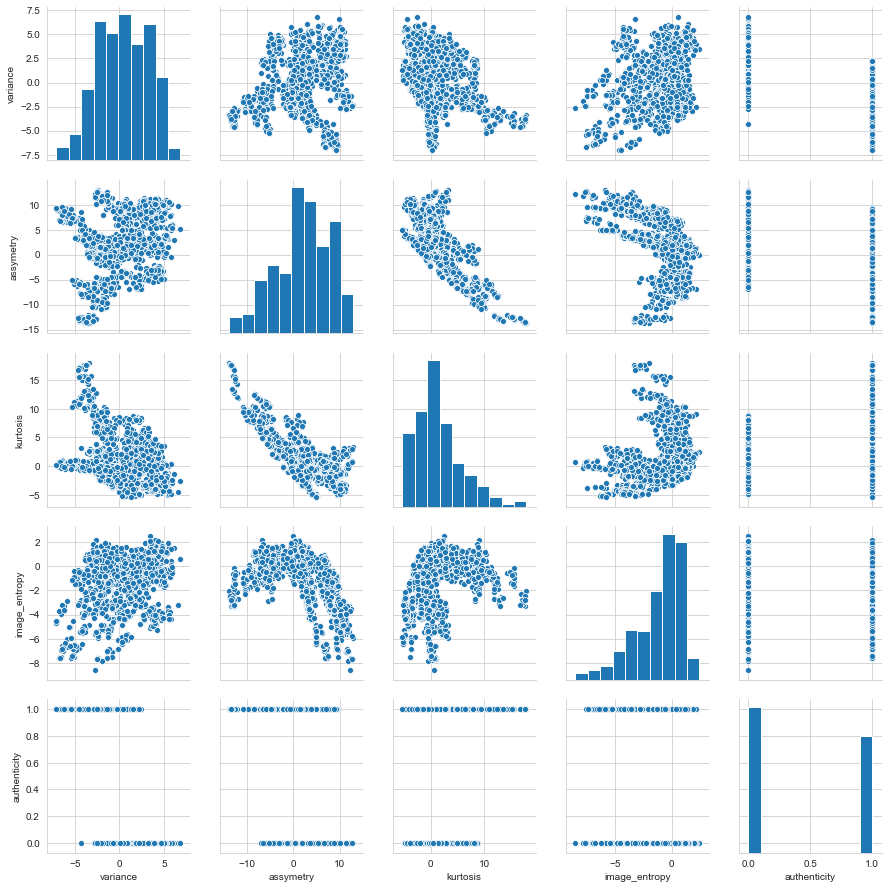

In [11]:
sns.pairplot(df)

Variance and image entropy are somewhat highly correlated. Also, assymetry and kurtosis are negative correlated (highly). 
Further using jointplot to compare the columns;

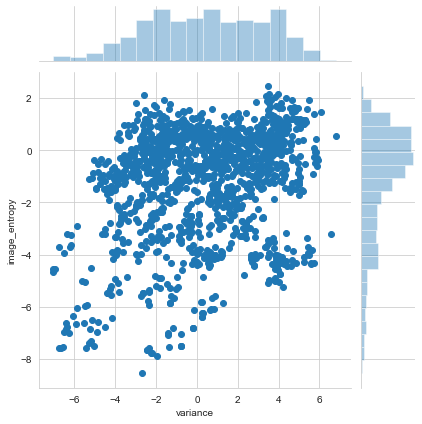

In [21]:
sns.jointplot('variance','image_entropy',data =df)

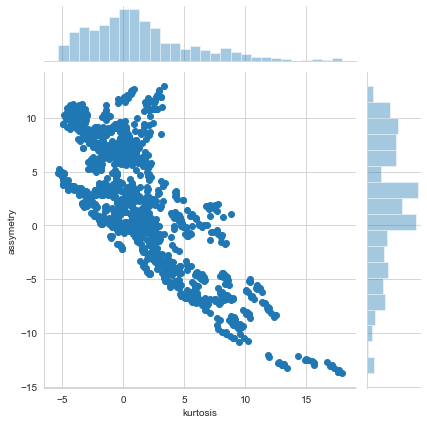

In [22]:
sns.jointplot('kurtosis','assymetry',data =df)

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
X = df.drop('authenticity',axis=1)
y = df['authenticity']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

C:\Users\Nmeso\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
prediction = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
print ('Confusion Matrix')
print (confusion_matrix(y_test,prediction))
print('\n')
print ('Classification Report')
print (classification_report(y_test,prediction))

Confusion Matrix
[[231   7]
 [  9 165]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       238
           1       0.96      0.95      0.95       174

    accuracy                           0.96       412
   macro avg       0.96      0.96      0.96       412
weighted avg       0.96      0.96      0.96       412



In [47]:
svc_model = SVC()

In [49]:
svc_model.fit(X_train,y_train)

C:\Users\Nmeso\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
pred_svc = svc_model.predict(X_test)

In [52]:
print ('Confusion Matrix')
print (confusion_matrix(y_test,pred_svc))
print('\n')
print ('Classification Report')
print (classification_report(y_test,pred_svc))

Confusion Matrix
[[231   7]
 [  0 174]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       238
           1       0.96      1.00      0.98       174

    accuracy                           0.98       412
   macro avg       0.98      0.99      0.98       412
weighted avg       0.98      0.98      0.98       412



The Support Vector Classification model performs better, having better performance metric 

Saving the model

In [53]:
import pickle

In [55]:
filename = 'log_model.sav'
pickle.dump(logmodel, open(filename, 'wb'))
 

In [56]:
filename = 'svc_model.sav'
pickle.dump(svc_model, open(filename, 'wb'))
 